### Read CSV and flatten json field

In [4]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

csv_path = '../Google_merchandise/data.csv'
df = pd.read_csv(csv_path)
print("Shape of dataframe: ",df.shape)
df.head(8)

# In 8th row, customDimensions has an empty list [], which would result in list out of range issue while we convert the list to JSON table,
# so we need to remove it first


Shape of dataframe:  (20000, 22)


,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,...,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,...,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN,1
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,...,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,1
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,...,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN,1
5,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,166277907528479249,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '16',...",Not Socially Engaged,"{'referralPath': '/offer/2145', 'campaign': '(...",1508196701,...,NaN,2,1.0,2.0,2.0,12.0,NaN,NaN,NaN,1
6,Referral,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8349655975937271469,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '4', ...",Not Socially Engaged,{'referralPath': '/a/google.com/nest-vision/dr...,1508152478,...,NaN,2,1.0,2.0,1.0,9.0,NaN,NaN,NaN,1
7,Organic Search,[],20171016,{'mobileDeviceInfo': 'not available in demo da...,1332629902468998662,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '19',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508206208,...,NaN,2,1.0,2.0,1.0,15.0,NaN,NaN,NaN,1


In [2]:
list(df.columns.values)

['channelGrouping',
 'customDimensions',
 'date',
 'device',
 'fullVisitorId',
 'geoNetwork',
 'hits',
 'socialEngagementType',
 'trafficSource',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'totals_bounces',
 'totals_hits',
 'totals_newVisits',
 'totals_pageviews',
 'totals_sessionQualityDim',
 'totals_timeOnSite',
 'totals_totalTransactionRevenue',
 'totals_transactionRevenue',
 'totals_transactions',
 'totals_visits']

### Convert JSON to dataframe 

In [3]:
def load_df(csv_path='../Google_merchandise/data.csv', nrows=None):
    
    JSON_COLUMNS = ['device', 'geoNetwork','trafficSource','hits','customDimensions']
    
    # Ex. [{'index': '4', 'value': 'EMEA'}]
    JSON_LIST_COLUMNS = ['customDimensions','hits']
    
    df = pd.read_csv(csv_path, 
                     #converters={column: eval for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)    
    
    
    for column in JSON_COLUMNS:
        
        if column in JSON_LIST_COLUMNS:
            #customDimensions has an empty list [], which would result in list out of range issue while we convert the list to JSON table,
             #so we need to replace it by [{}] first. 
            # eval can help convert the str to Json datatype or in other words, it can extract the content inside the string. 
            # Ex. [Ex. eval("[{'a':'b'}]") -> [{'a':'b'}]
            # then we need to extract the element inside the list, therefore we use apply(lambda x: x[0])) Ex. [{'a':'b'}] -> {'a':'b'}
            # Finally, we can get desired JSON format then implement json_normalize
            column_as_df = json_normalize( df[column].apply(lambda x: x.replace('[]','[{}]')).apply(lambda x: eval(x)).apply(lambda x: x[0]) )
            
        else:
            #It will normalize and set the json to a table
            # eval can help convert the str to Json datatype. Ex. eval("{'a':'b'}") -> {'a':'b'}
            column_as_df = json_normalize(df[column].apply(lambda x: eval(x)))
        
        # here will be set the name using the category and subcategory of json columns
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        # after extracting the values, let drop the original columns
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    
    return df

# print(os.listdir("../Lilian Project"))
df = load_df()


In [4]:
df.head(2)
print("The shape of data-flattened dataframe ",df.shape)

The shape of data-flattened dataframe  (20000, 115)


In [ ]:
# Save the file as data-flattened.csv
df.to_csv("data-flattened.csv", index=False)

In [5]:
csv_path='../Lilian Project/data-flattened.csv'
df_ = pd.read_csv(csv_path)
df_.shape
# list(df_.columns.values)

/Users/glen/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (83,89,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(20000, 115)

### EDA

#### Target Variable Exploration:

Since we are predicting the natural log of sum of all transactions of the user, let us sum up the transaction revenue at user level and take a log and then do a scatter plot.

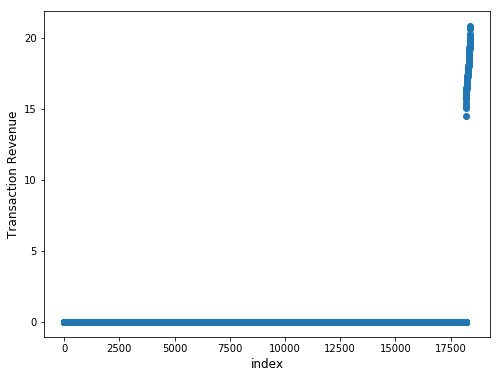

In [7]:
import matplotlib.pyplot as plt
df_["totals_transactionRevenue"] = df["totals_transactionRevenue"].astype('float')
gdf = df_.groupby("fullVisitorId")["totals_transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals_transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('Transaction Revenue', fontsize=12)
plt.show()

#### Extract date features

In [8]:
# library of datetime
from datetime import datetime

# This function is to extract date features
def date_process(df):
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d") # seting the column as pandas datetime
    df["_weekday"] = df['date'].dt.weekday #extracting week day
    df["_day"] = df['date'].dt.day # extracting day
    df["_month"] = df['date'].dt.month # extracting day
    df["_year"] = df['date'].dt.year # extracting day
    df['_visitHour'] = (df['visitStartTime'].apply(lambda x: datetime.fromtimestamp(x).hour)).astype(int)
    
    return df #returning the df after the transformations

df_ = date_process(df_) #calling the function that we created above

df_.head(n=2) 

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,...,hits.time,hits.transaction.currencyCode,hits.type,customDimensions.index,customDimensions.value,_weekday,_day,_month,_year,_visitHour
0,Organic Search,2017-10-16,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,1.0,1,1.0,...,0.0,USD,PAGE,4.0,EMEA,0,16,10,2017,19
1,Referral,2017-10-16,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,NaN,2,NaN,...,0.0,NaN,PAGE,4.0,North America,0,16,10,2017,12


#### Defining some functions that I will use to call clean the data

In [9]:
def FillingNaValues(df):    # fillna numeric feature
    df['totals_pageviews'].fillna(1, inplace=True) #filling NA's with 1
    df['totals_pageviews'].astype(int)
    df['totals_newVisits'].fillna(0, inplace=True) #filling NA's with 0
    df['totals_newVisits'].astype(int)
    df['totals_bounces'].fillna(0, inplace=True)   #filling NA's with 0
    df['totals_bounces'].astype(int)
    df["totals_transactionRevenue"] = df["totals_transactionRevenue"].astype(float).fillna(-1) #filling NA with -1
    df['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False
    df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
    df.loc[df['geoNetwork.city'] == "(not set)", 'geoNetwork.city'] = np.nan
    df['geoNetwork.city'].fillna("NaN", inplace=True)

    return df #return the transformed dataframe

In [10]:
FillingNaValues(df_).head(2)

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,...,hits.time,hits.transaction.currencyCode,hits.type,customDimensions.index,customDimensions.value,_weekday,_day,_month,_year,_visitHour
0,Organic Search,2017-10-16,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,1.0,1,1.0,...,0.0,USD,PAGE,4.0,EMEA,0,16,10,2017,19
1,Referral,2017-10-16,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,0.0,2,0.0,...,0.0,NaN,PAGE,4.0,North America,0,16,10,2017,12


#### drop the constant values that is not useful and will make the df lighter

In [11]:
# We will takeoff all columns where we have a unique value (constants)
# It is useful because this columns don't give us none information
discovering_consts = [col for col in df_.columns if df_[col].nunique() == 1]

# printing the total of columns dropped and the name of columns 
print("Columns with just one value: ", len(discovering_consts), "columns")
print("Name of constant columns: \n", discovering_consts)

Columns with just one value:  49 columns
Name of constant columns: 
 ['socialEngagementType', 'totals_visits', 'device.browserSize', 'device.browserVersion', 'device.flashVersion', 'device.language', 'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'trafficSource.adwordsClickInfo.criteriaParameters', 'hits.appInfo.screenDepth', 'hits.contentGroup.contentGroup4', 'hits.contentGroup.contentGroup5', 'hits.contentGroup.contentGroupUniqueViews1', 'hits.contentGroup.contentGroupUniqueViews2', 'hits.contentGroup.contentGroupUniqueViews3', 'hits.contentGroup.previousContentGroup1', 'hits.contentGroup.previousContentGroup2', 'hits.contentGroup.previousContentGroup3', 'hits.contentGroup.previousContentGroup4', 'hits.

In [12]:
#Here are all columns that the unique value is 'not available in demo dataset'
not_avai_list = ['device.browserSize','device.browserVersion','device.flashVersion','device.language','device.mobileDeviceBranding','device.mobileDeviceInfo','device.mobileDeviceMarketingName','device.mobileDeviceModel','device.mobileInputSelector','device.operatingSystemVersion','device.screenColors',
 'device.screenResolution','geoNetwork.cityId','geoNetwork.latitude','geoNetwork.longitude','geoNetwork.metro','geoNetwork.networkLocation','geoNetwork.region','trafficSource.adwordsClickInfo.criteriaParameters']

In [13]:
to_drop = [i for i in discovering_consts if i not in not_avai_list] + not_avai_list
df_.drop(to_drop, axis=1, inplace=True)
print("The shape after dropping unimportant columns is", df_.shape)

The shape after dropping unimportant columns is (20000, 69)


In [14]:
# seen = []
# duplicate_UID = []
# a = 0
# for i in df_supervised['fullVisitorId']:
#     if i not in seen:
#         seen.append(i)
#     else:
#         duplicate_UID.append(i)

# # Check the duplicate data 
# a = df_supervised.loc[df_supervised['fullVisitorId'].isin(duplicate_UID)]
# a.iloc[:,0:15]

### Detect outliers

In [15]:
def CalcOutliers(df_num): 

    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

In [16]:
CalcOutliers(df_['totals_transactionRevenue'])

Identified lowest outliers: 0
Identified upper outliers: 76
Identified outliers: 76
Non-outlier observations: 19924
Total percentual of Outliers:  0.3814


### Explore the distribution of Device Browser

In our top 5 browsers we have more than 94% of total¶

/Users/glen/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



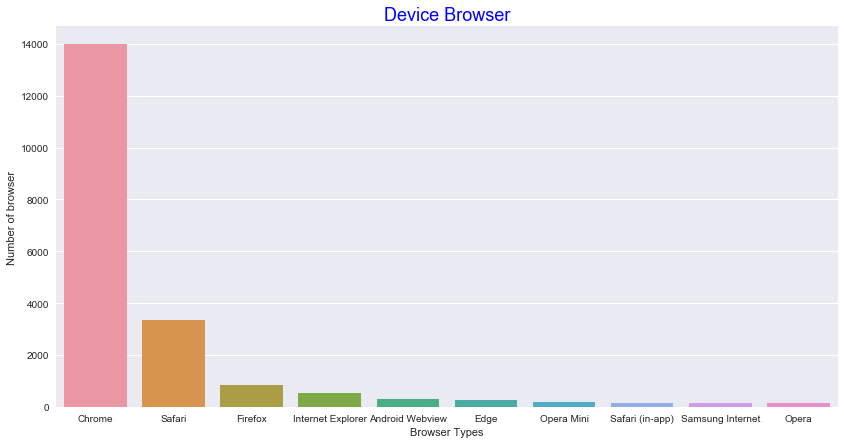

In [17]:
# import graph objects as "go"
import plotly.graph_objs as go
import plotly.plotly as py
%matplotlib inline
import seaborn as sns

# the top 10 of browsers represent % of total
df_['device.browser'].value_counts()[:7]


# kill weapon
browser = df_['device.browser'].value_counts()
plt.figure(figsize=(14,7))
sns.barplot(x=browser[:10].index,y=browser[:10].values)
plt.ylabel('Number of browser')
plt.xlabel('Browser Types')
plt.title('Device Browser',color = 'blue',fontsize=18)


/Users/glen/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



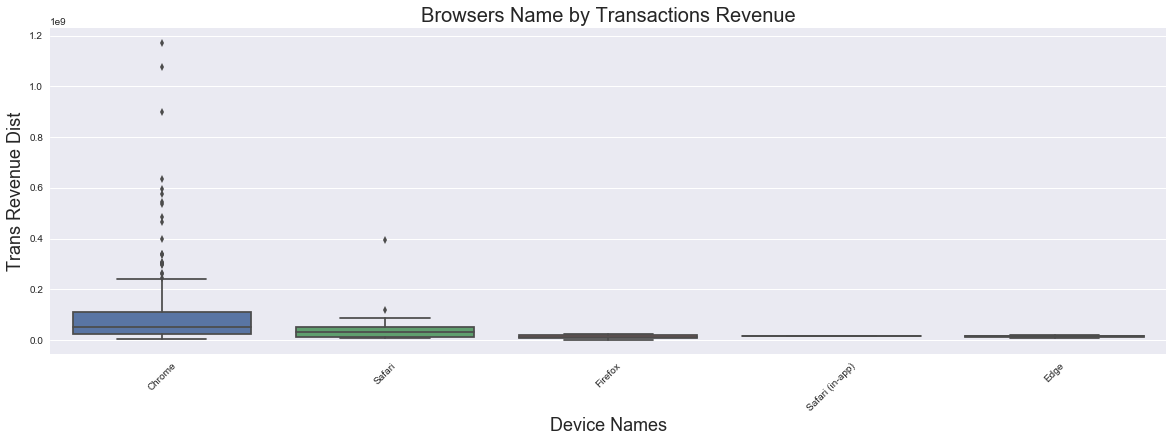

In [18]:
plt.figure(figsize=(20,6)) #figure size
g1 = sns.boxplot(x='device.browser', y='totals_transactionRevenue', 
                   data=df_[(df_['device.browser'].isin((df_['device.browser'].value_counts()[:5].index.values))) &
                                  df_['totals_transactionRevenue'] > 0])
g1.set_title('Browsers Name by Transactions Revenue', fontsize=20) # title and fontsize
g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g1.set_xlabel('Device Names', fontsize=18) # Xlabel
g1.set_ylabel('Trans Revenue Dist', fontsize=18) #Ylabel

plt.show()

Chrome have highest values in general but the highest value of transactions was did on Firefox.
We can see a "small" but consistent sells in Safari. Also IE and Edge give some results to Google;

Percentual of Channel Grouping used: 
Referral          96
Organic Search    63
Direct            25
Paid Search        7
Display            2
Name: channelGrouping, dtype: int64


/Users/glen/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



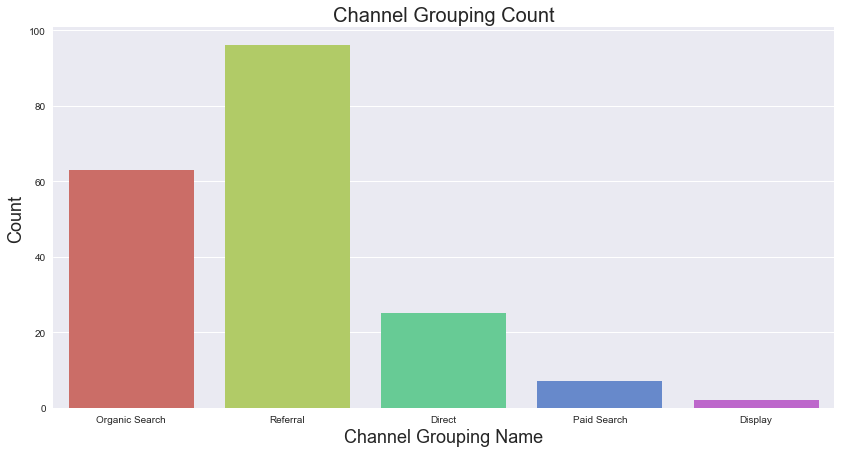

In [19]:
# the top 10 of browsers represent % of total
print("Percentual of Channel Grouping used: ")
print((df_['channelGrouping'].value_counts()[:5])) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(df_["channelGrouping"], palette="hls") # It's a module to count the category's
plt.title("Channel Grouping Count", fontsize=20) # seting the title size
plt.xlabel("Channel Grouping Name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size

plt.show() #use plt.show to render the graph that we did above

TOP 1 => Organic Search - 42.99%

TOP 2 => Social - 24.39%

TOP 3 => Direct - 15.42%

TOP 4 => Referral - 11.89%

TOP 5 => Paid Search - 2.55%

### Crossing Channel Grouping x Browsers

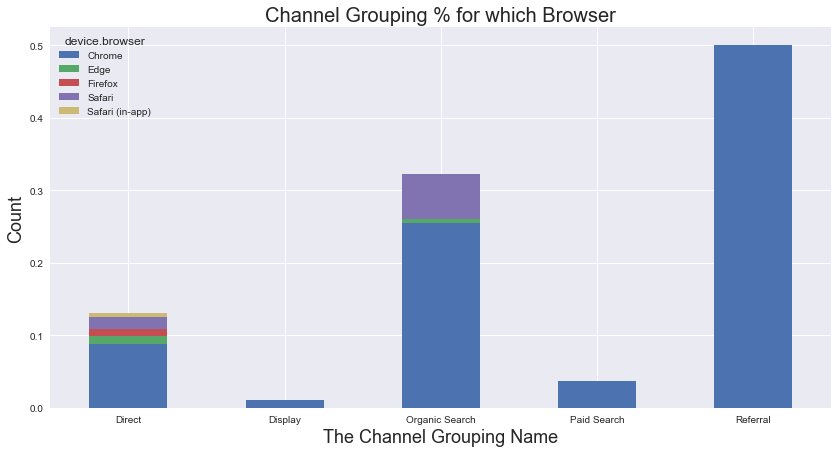

In [20]:
# At index I will use set my variable that I want analyse and cross by another
crosstab_eda = pd.crosstab(index=df_['channelGrouping'], normalize=True,
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=df_[df_['device.browser'].isin(df_['device.browser']\
                                                                            .value_counts()[:5].index.values)]['device.browser'])
# Ploting the crosstab that we did above
crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Channel Grouping % for which Browser", fontsize=20) # seting the title size
plt.xlabel("The Channel Grouping Name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=0)
plt.show() # rendering

### Operational System

Percentual of Operational System: 
Macintosh    111
Windows       34
Chrome OS     18
iOS           12
Linux         12
Name: device.operatingSystem, dtype: int64


/Users/glen/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



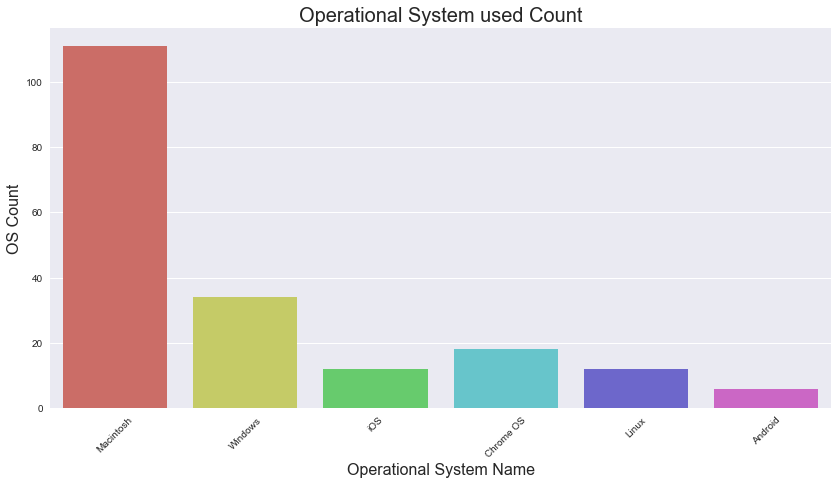

In [21]:
# the top 5 of browsers represent % of total
print("Percentual of Operational System: ")
print(df_['device.operatingSystem'].value_counts()[:5]) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(df_["device.operatingSystem"], palette="hls") # It's a module to count the category's
plt.title("Operational System used Count", fontsize=20) # seting the title size
plt.xlabel("Operational System Name", fontsize=16) # seting the x label size
plt.ylabel("OS Count", fontsize=16) # seting the y label size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

### Split the label and split the data into 70% training and 30% testing dataset (For supervised learning dataframe)

In [22]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import csv
from xgboost import XGBRegressor
from sklearn import preprocessing
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# For supervised learning, we should select the rows with true label first
df_unsupervised = df_
df_supervised = df_.loc[df_['totals_transactionRevenue'] != -1]
print("Transaction Revenue (label) count: {0}".format(int(df_supervised['totals_transactionRevenue'].count())))

#Examine the number of ID
print("Unique VistorID number", pd.unique(df_['fullVisitorId']).size)

#The shape of supervised_df
print("The shape of supervised_df is ", df_supervised.shape )

# Split data into input and output
label = df_supervised['totals_transactionRevenue']
feature = df_supervised.drop(columns = ['totals_transactionRevenue'])

#Split data in train and test set
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3,random_state=12)

print("Train dataset contains {0} rows and {1} columns".format(X_train.shape[0], X_train.shape[1]))
print("Test dataset contains {0} rows and {1} columns".format(X_test.shape[0], X_test.shape[1]))

#Save the train.csv and test.csv file

X_train.to_csv('train_sup.csv', index = False)
X_test.to_csv('test_sup.csv', index = False)

Transaction Revenue (label) count: 193
Unique VistorID number 189
The shape of supervised_df is  (193, 69)
Train dataset contains 135 rows and 68 columns
Test dataset contains 58 rows and 68 columns


### Split the label and split the data into 70% training and 30% testing dataset (For unsupervised learning dataframe) 
Before we do unsupervised learning, we need to add label on each user. Based on "transaction revenue", I seperate them into Low ,Median ,High three groups. 

In [23]:
from sklearn.model_selection import train_test_split

a = df_unsupervised['totals_transactionRevenue'][df_unsupervised['totals_transactionRevenue'] != -1].astype(float)
low = int(np.percentile(a, [25, 50, 75])[0])
high = int(np.percentile(a, [25, 50, 75])[2])

print("The label would be High if the value is larger than {0}".format(high))
print("The label would be Median if the value is larger than {0} and smaller than {1}".format(high,low))
print("The label would be low if the value is smaller than {0}".format(low))

# Create a new column "transactionRevenueLabel" to save the label
df_unsupervised['transactionRevenueLabel'] = None
df_unsupervised['transactionRevenueLabel'][df_unsupervised['totals_transactionRevenue'] >= high] = "High"
df_unsupervised['transactionRevenueLabel'][df_unsupervised['totals_transactionRevenue'] < low] = "Low"
df_unsupervised['transactionRevenueLabel'][(low < df_unsupervised['totals_transactionRevenue']) &  (df_unsupervised['totals_transactionRevenue'] < high)] = "Median"

#To prevent data leakage, drop totals_transactionRevenue and transactionRevenueLabel
label = df_unsupervised['transactionRevenueLabel']
feature = df_unsupervised.drop(columns = ['totals_transactionRevenue','transactionRevenueLabel'])

#Split data in train and test set
X_train_, X_test_, y_train_, y_test_ = train_test_split(feature, label, test_size=0.3,random_state=12)

print("Train dataset contains {0} rows and {1} columns".format(X_train.shape[0], X_train.shape[1]))
print("Test dataset contains {0} rows and {1} columns".format(X_test.shape[0], X_test.shape[1]))

#Save the train.csv and test.csv file

X_train_.to_csv('train_unsup.csv', index = False)
X_test_.to_csv('test_unsup.csv', index = False)

The label would be High if the value is larger than 108720000
The label would be Median if the value is larger than 108720000 and smaller than 21020000
The label would be low if the value is smaller than 21020000
Train dataset contains 135 rows and 68 columns
Test dataset contains 58 rows and 68 columns


/Users/glen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/glen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/glen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### Use label encoder to deal with categorial veriable

In [24]:
sup_train_path = '../Lilian Project/train_sup.csv'
sup_test_path = '../Lilian Project/test_sup.csv'
unsup_train_path = '../Lilian Project/train_unsup.csv'
unsup_test_path = '../Lilian Project/test_unsup.csv'

train_df = pd.read_csv(sup_train_path)
test_df = pd.read_csv(sup_test_path)

train_df_ = pd.read_csv(unsup_train_path)
test_df_ = pd.read_csv(unsup_test_path)

train_id = train_df["fullVisitorId"].values
test_id = test_df["fullVisitorId"].values

# Assign fullVisitorId as index of dataframe
train_df = train_df.set_index('fullVisitorId')
test_df = test_df.set_index('fullVisitorId')
train_df_ = train_df_.set_index('fullVisitorId')
test_df_ = test_df_.set_index('fullVisitorId')

# label encode the categorical variables and convert the numerical variables to float
cat_cols = ["channelGrouping", "device.browser", 
            "device.deviceCategory", "device.operatingSystem", 
            "geoNetwork.city", "geoNetwork.continent", 
            "geoNetwork.country", 
            "geoNetwork.networkDomain",  
            "geoNetwork.subContinent", "trafficSource.adContent", 
            "trafficSource.adwordsClickInfo.adNetworkType", 
            "trafficSource.adwordsClickInfo.gclId", 
            "trafficSource.adwordsClickInfo.page", 
            "trafficSource.adwordsClickInfo.slot", "trafficSource.campaign",
            "trafficSource.keyword", "trafficSource.medium", 
            "trafficSource.referralPath", "trafficSource.source",
            'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.isTrueDirect', 
            'customDimensions.value']

for col in cat_cols:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[col].values.astype('str')) + list(test_df[col].values.astype('str')))
    train_df[col] = lbl.transform(list(train_df[col].values.astype('str')))
    test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))
    train_df_[col] = lbl.transform(list(train_df_[col].values.astype('str')))
    test_df_[col] = lbl.transform(list(test_df_[col].values.astype('str')))

num_cols = ["totals_hits", "totals_pageviews", "visitNumber", "visitStartTime", 'totals_bounces',  'totals_newVisits'  ,'hits.hitNumber',
 'hits.hour']   
for col in num_cols:
    train_df[col] = train_df[col].astype(float)
    test_df[col] = test_df[col].astype(float)
    train_df_[col] = train_df_[col].astype(float)
    test_df_[col] = test_df_[col].astype(float)
    
    
train_df = train_df[cat_cols + num_cols] 
test_df = test_df[cat_cols + num_cols] 

train_df_ = train_df[cat_cols + num_cols] 
test_df_ = test_df[cat_cols + num_cols] 

In [25]:
def evaluation(pre_test_y,y_test):
    #Set minus label to 0.01
    pre_test_y = [i if i > 0 else 0.01 for i in pre_test_y]
    ans = round(math.sqrt(np.mean(np.square(np.log(pre_test_y) - np.log(np.array(y_test)))/8)), 4)
    print("Root-Mean-Squared-Error (RMSE) for Gradient boost model is {0}".format(ans))
    return

def plotresult(pre_test_y,y_test):
    fig, ax = plt.subplots(figsize=(40, 20))
    plt.style.use('ggplot')
    plt.plot(pre_test_y, y_test, 'ro')
    plt.xlabel('Predictions', fontsize = 30)
    plt.ylabel('Reality', fontsize = 30)
    plt.title('Predictions x Reality on dataset Test', fontsize = 30)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    return

### Use MSPE as the evaluation matrix to measure model's performance. 

### 1. supervised ML method: XGBoost

Root-Mean-Squared-Error (RMSE) for Gradient boost model is 1.539


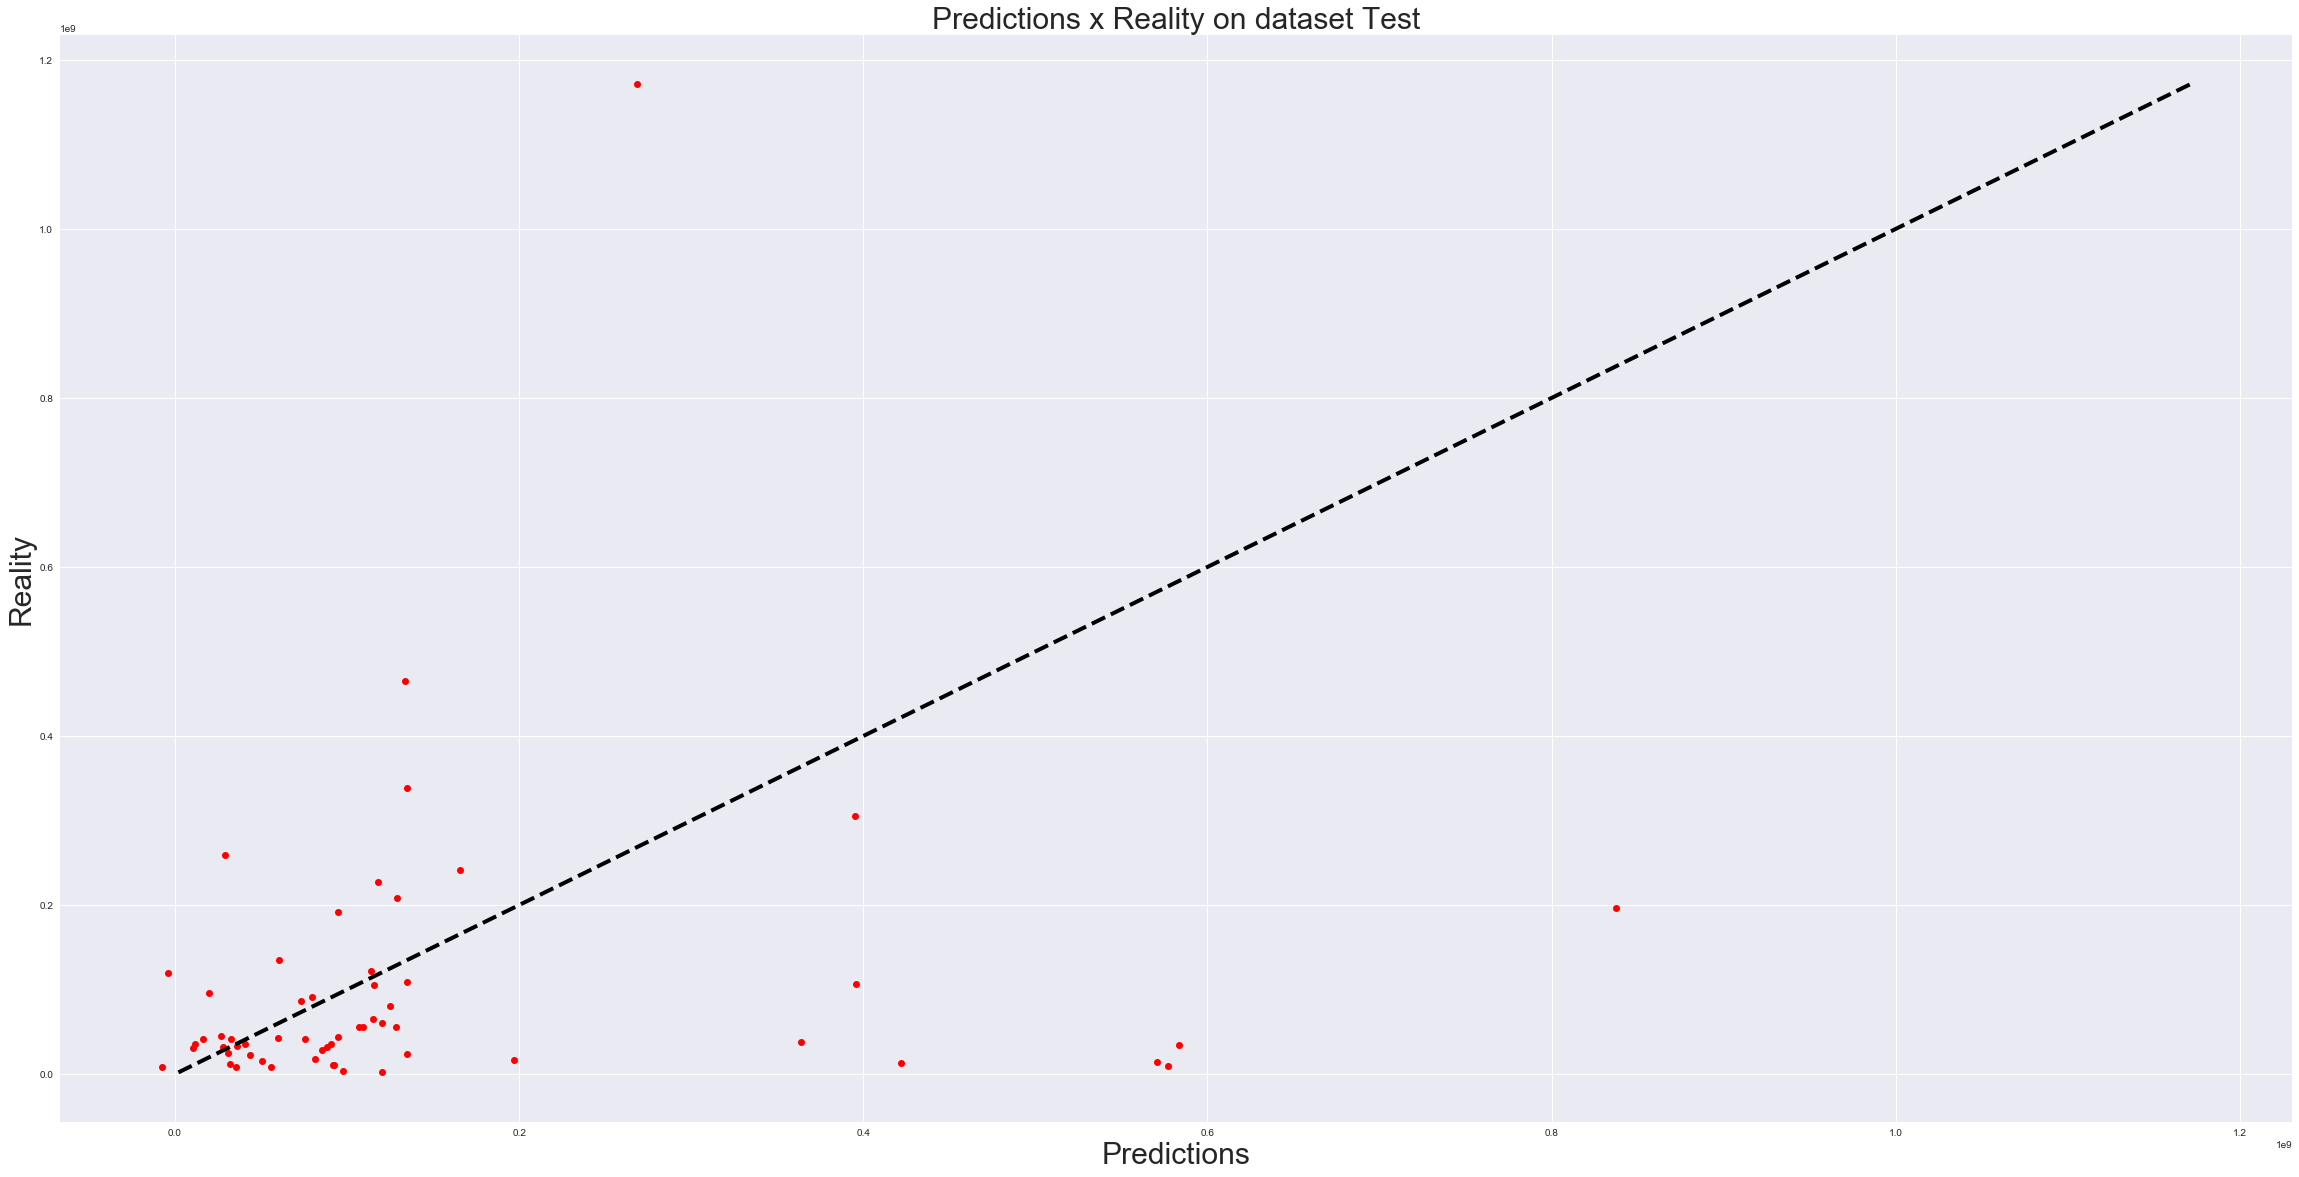

In [26]:
from xgboost import XGBRegressor
import math
#XGboost
XGB = XGBRegressor()
XGB.fit(train_df, y_train, verbose=False)
pre_test_y = XGB.predict(test_df)

evaluation(pre_test_y,y_test)
plotresult(pre_test_y,y_test)





### 2. supervised ML method: Gradient Boosted Regression

Root-Mean-Squared-Error (RMSE) for Gradient boost model is 1.5001


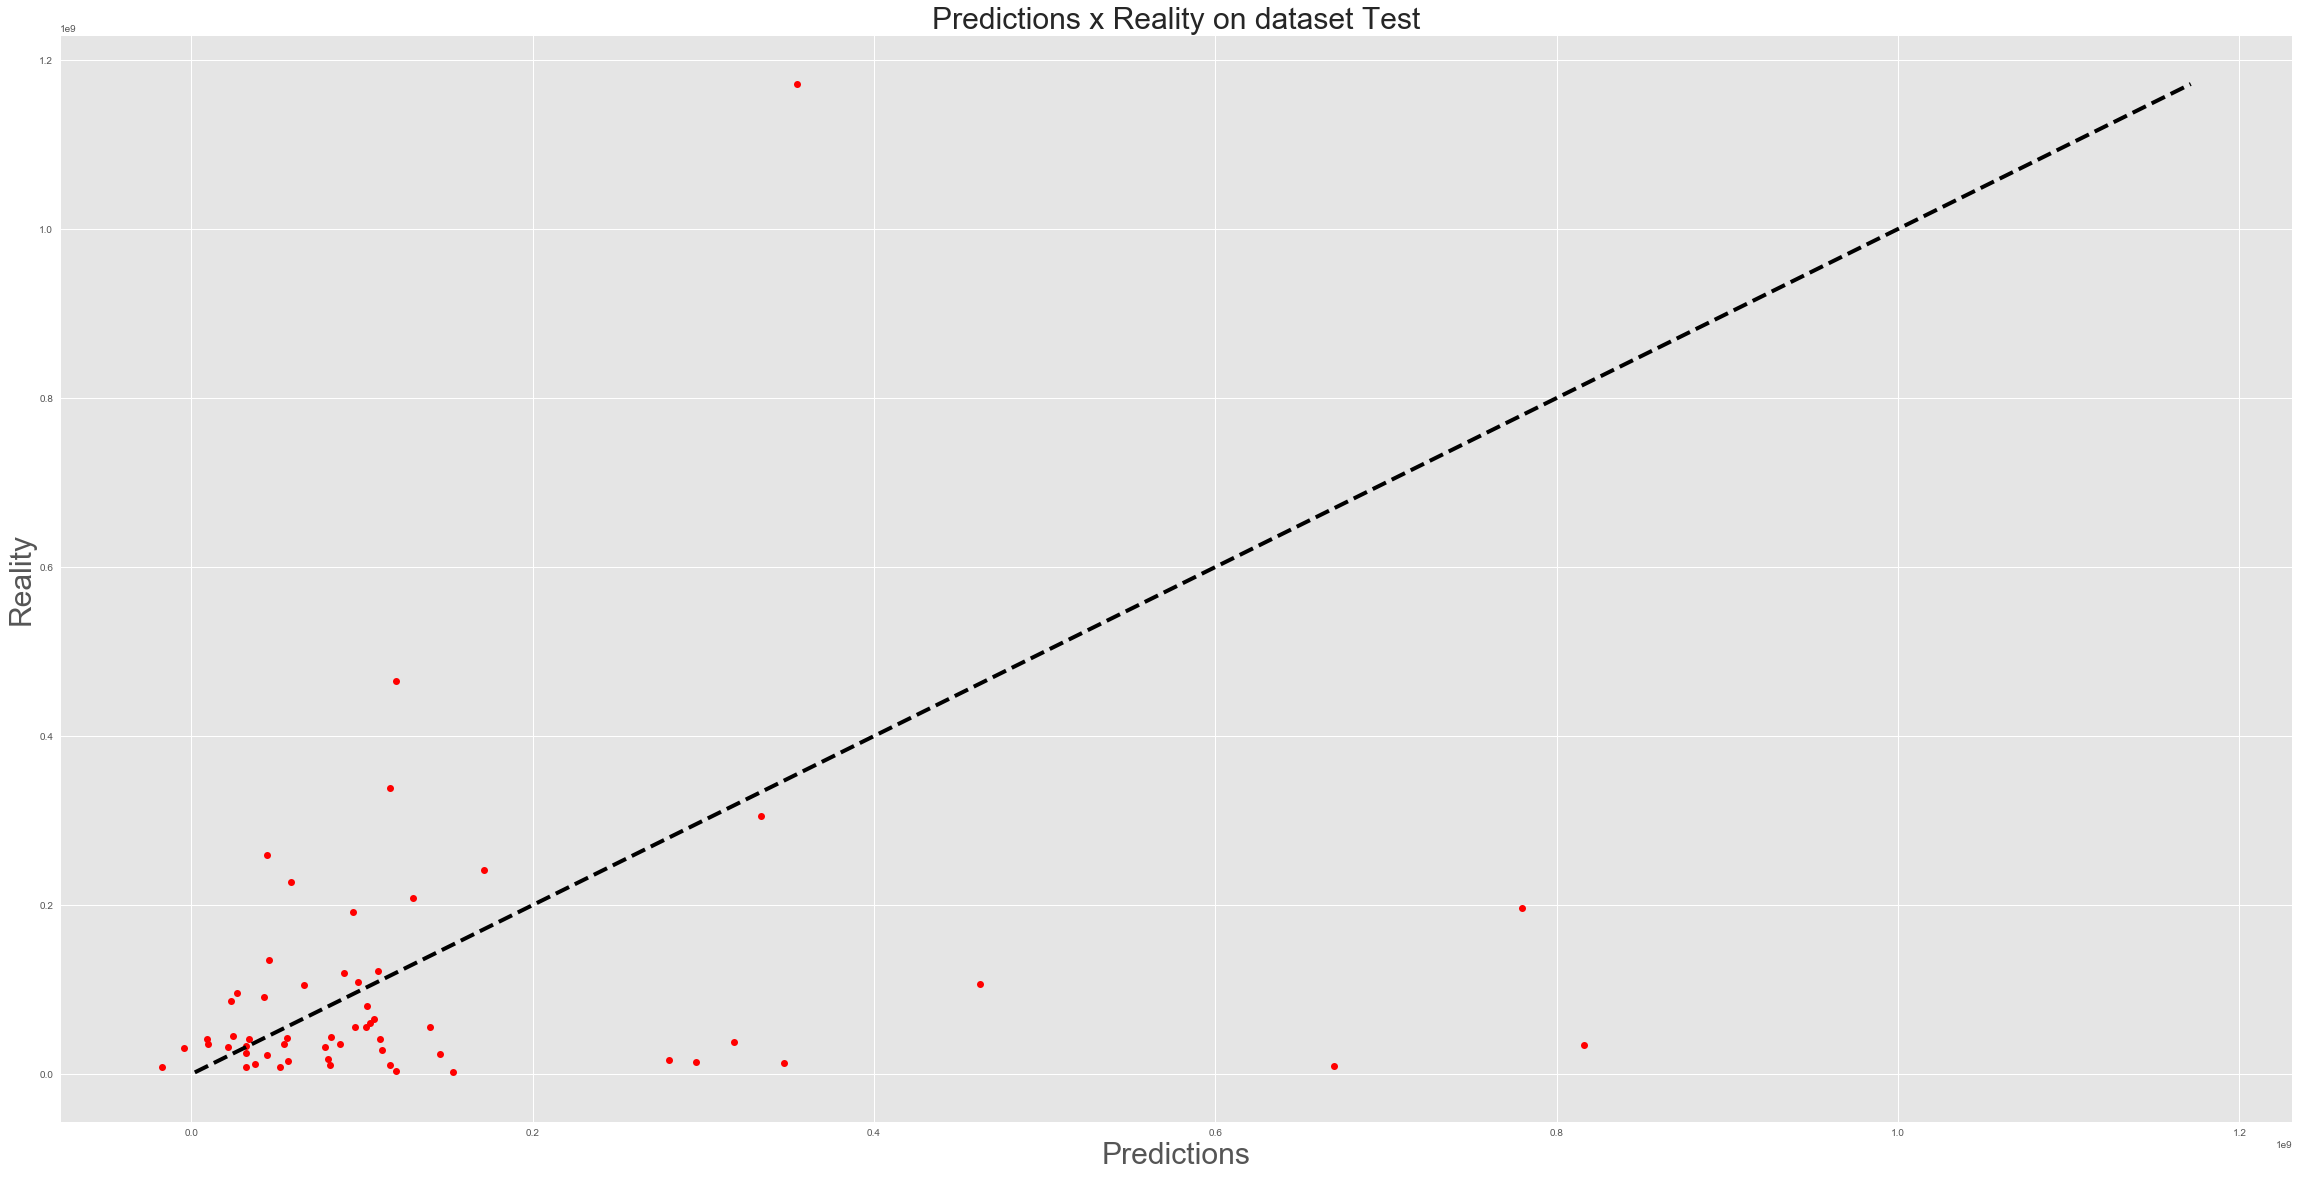

In [27]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingRegressor
# Use Gradient Boosted Regression Trees
gbrt=GradientBoostingRegressor(n_estimators=100) 
gbrt.fit(train_df, y_train)
pre_test_y = gbrt.predict(test_df)

evaluation(pre_test_y,y_test)
plotresult(pre_test_y,y_test)
# #Set minus label to 0.01
# pre_test_y = [i if i > 0 else 0.01 for i in pre_test_y]

# ans = round(math.sqrt(np.mean(np.square(np.log(pre_test_y) - np.log(np.array(y_test))))), 4)
# print("Root-Mean-Squared-Error (RMSE) for Gradient boost model is {0}".format(ans))

### 3. unsupervised ML method: PCA (dimension reduction)

Root-Mean-Squared-Error (RMSE) for Gradient boost model is 0.6278


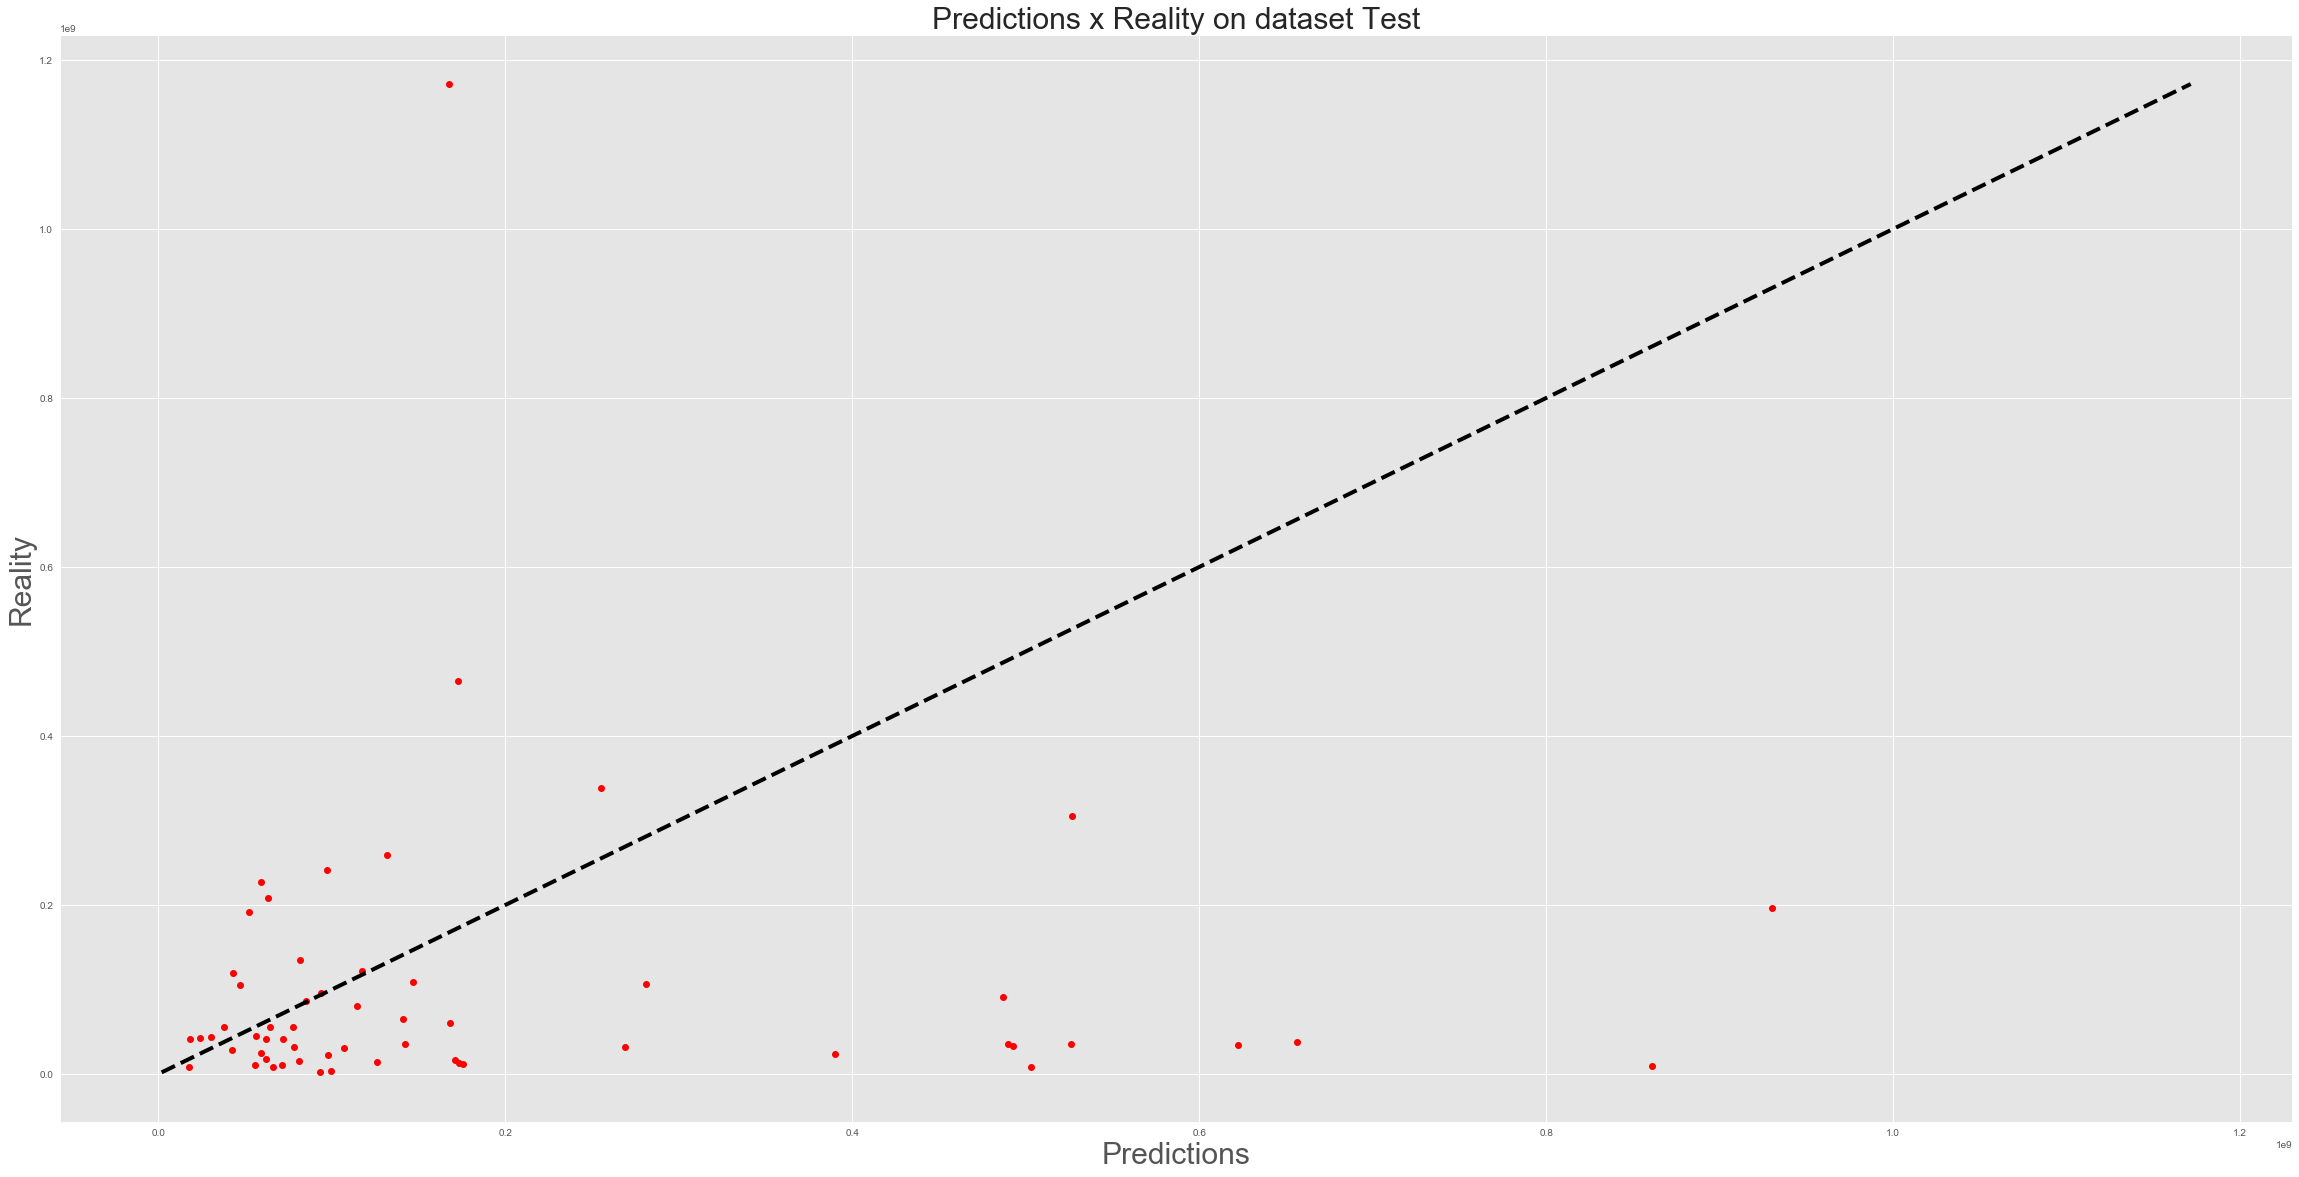

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
principalComponents_train = pca.fit_transform(train_df)
train_df = pd.DataFrame(data = principalComponents_train)

principalComponents_test = pca.fit_transform(test_df)
test_df = pd.DataFrame(data = principalComponents_test)


#Then we implement our new dimension reduced train_df on original GBRT model, and we found out that the RMSE reduced to 0.6285
gbrt=GradientBoostingRegressor(n_estimators=100) 
gbrt.fit(train_df, y_train)
pre_test_y = gbrt.predict(test_df)

evaluation(pre_test_y,y_test)
plotresult(pre_test_y,y_test)

### 4. unsupervised ML method: Independent Component Analysis (dimension reduction)

Root-Mean-Squared-Error (RMSE) for Gradient boost model is 1.6418


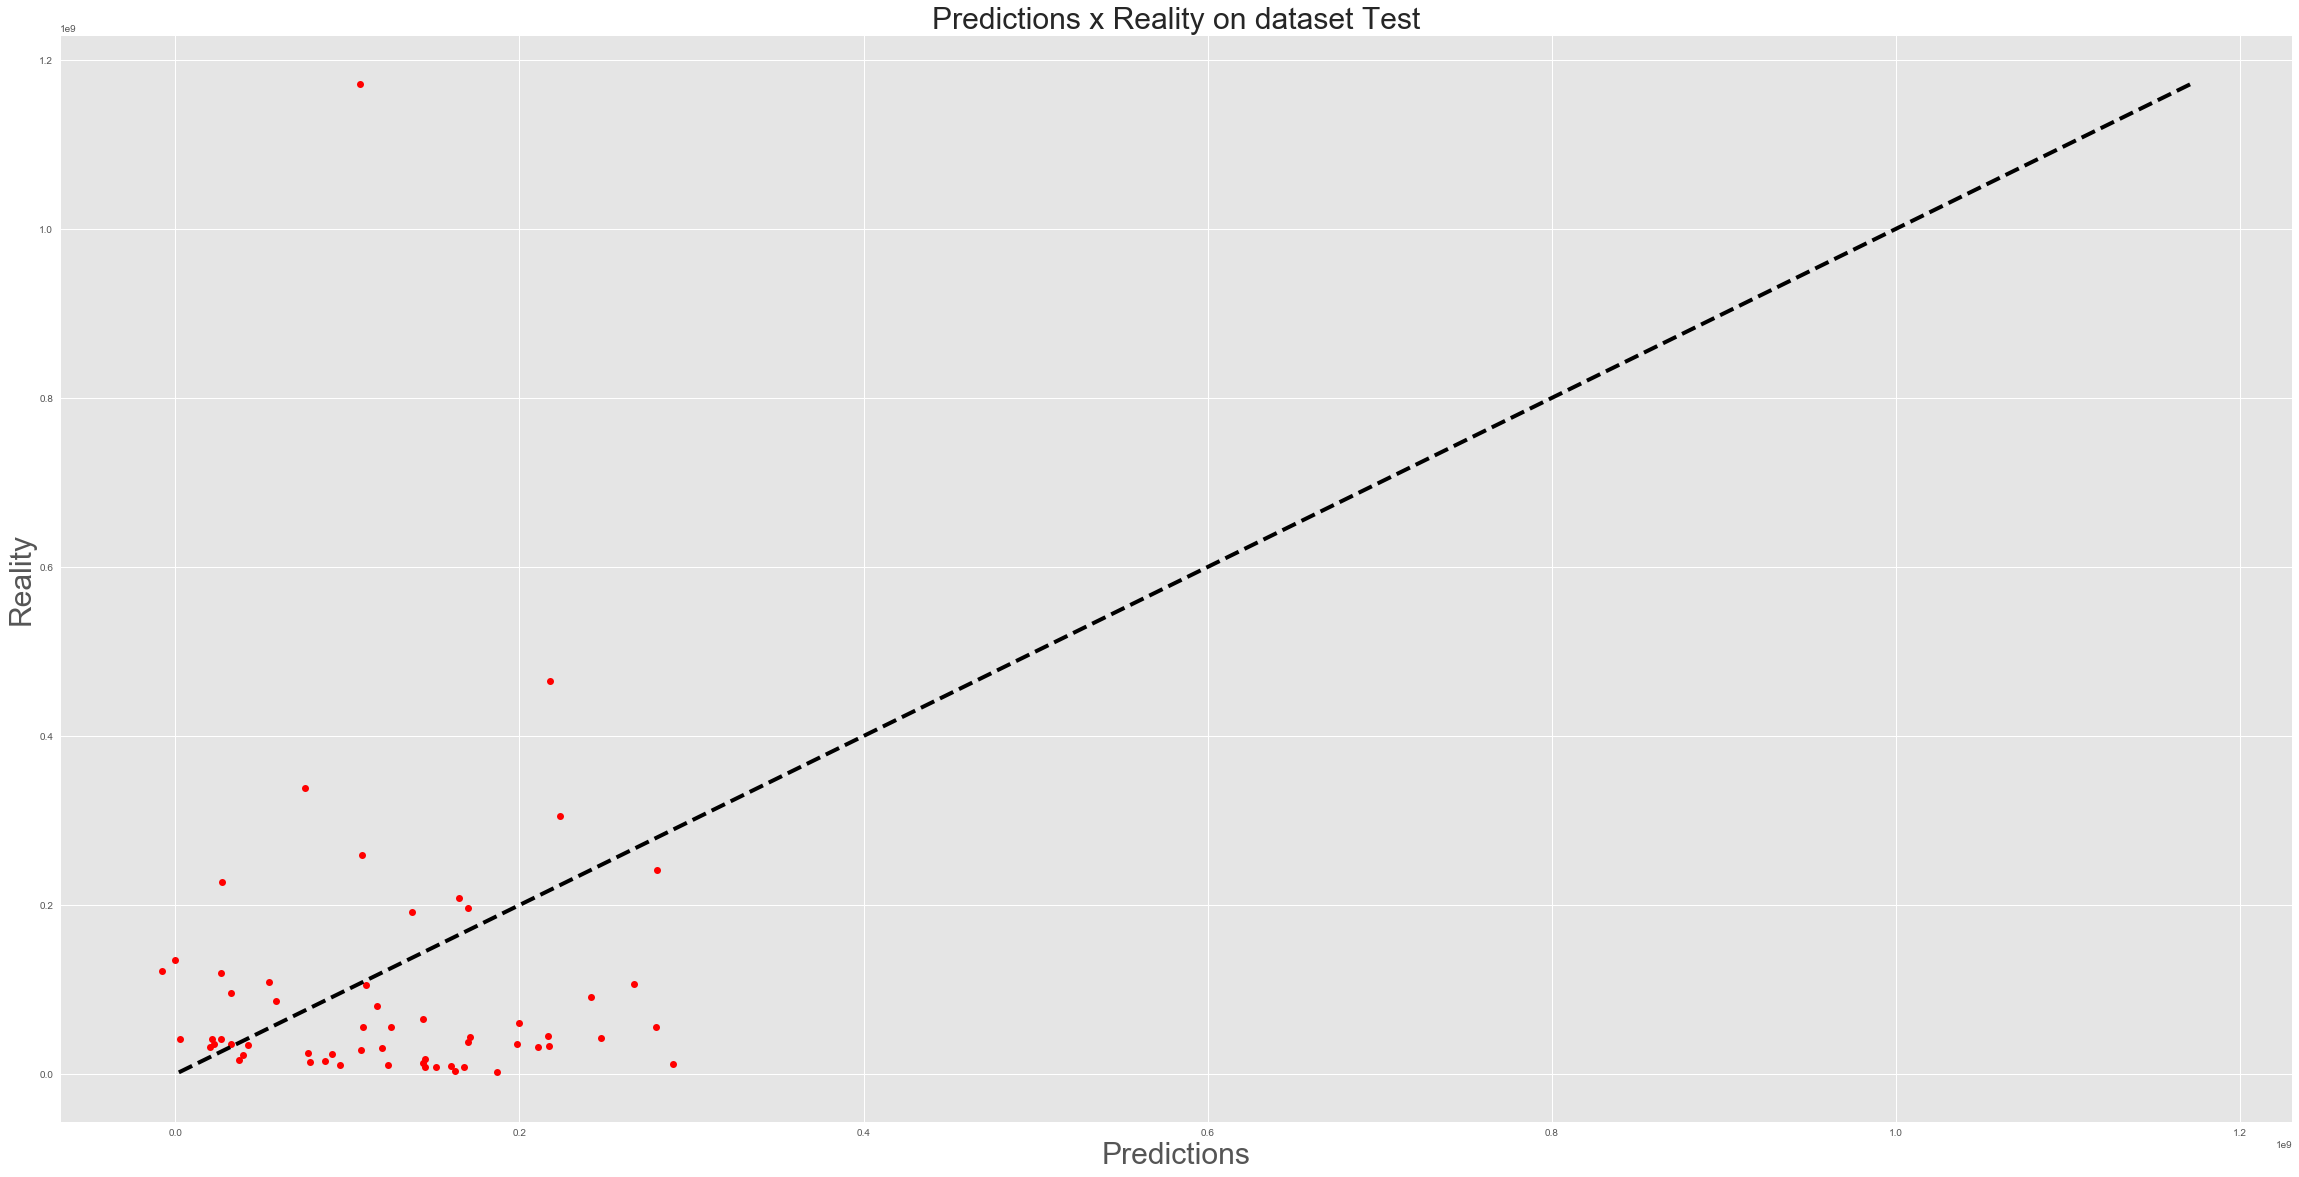

In [29]:
from sklearn.decomposition import FastICA

transformer = FastICA(n_components=8)
X_transformed = transformer.fit_transform(train_df)
train_df = pd.DataFrame(data = X_transformed)

X_transformed = transformer.fit_transform(test_df)
test_df = pd.DataFrame(data = X_transformed)

#Then we implement our new dimension reduced train_df on original GBRT model, and we found out that the RMSE reduced to 1.8634
gbrt=GradientBoostingRegressor(n_estimators=100) 
gbrt.fit(train_df, y_train)
pre_test_y = gbrt.predict(test_df)

evaluation(pre_test_y,y_test)
plotresult(pre_test_y,y_test)



### 5. unsupervised ML method: Kmeans (Cluster)

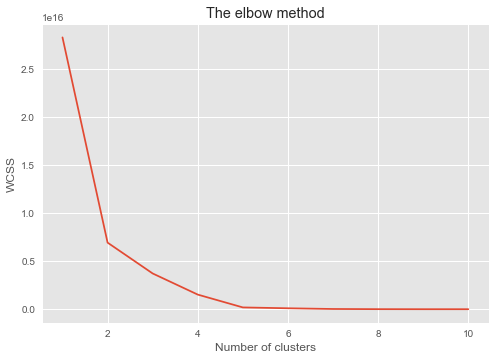

In [36]:
from sklearn import cluster, mixture # For clustering 
from sklearn.cluster import KMeans


#Finding the optimum number of clusters for k-means classification

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(train_df_)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = train_df_.values
# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
y_kmeans = kmeans.predict(X)
# Centroid values
C = kmeans.cluster_centers_

# # X = X.as_matrix(columns=None)
# # Visualising the clusters
# plt.scatter(X[:,0], X[:,1],X[:,2],X[:,3],X[:,4],c=('red','blue','yellow','black','green'))
# # plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue')
# # plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green')
# # plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],s=100,c='yellow')
# # plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4,1],s=100,c='black')
# # plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
# plt.title('tt')
# plt.legend()
# plt.show()

In [ ]:
# def plotData(df, groupby):
#     "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
#     # make a figure with just one subplot.
#     # you can specify multiple subplots in a figure, 
#     # in which case ax would be an array of axes,
#     # but in this case it'll just be a single axis object.
#     fig, ax = plt.subplots(figsize = (7,7))

#     # color map
#     cmap = mpl.cm.get_cmap('prism')

#     # we can use pandas to plot each cluster on the same graph.
#     # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
#     for i, cluster in df.groupby(groupby):
#         cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
#                      kind = 'scatter', 
#                      x = 'PC1', y = 'PC2',
#                      color = cmap(i/(nclusters-1)), # cmap maps a number to a color
#                      label = "%s %i" % (groupby, i), 
#                      s=30) # dot size
#     ax.grid()
#     ax.axhline(0, color='black')
#     ax.axvline(0, color='black')
#     ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

### 6. unsupervised ML method: GMM (Cluster)

In [7]:
# now let's try GMM clustering, which tries to fit normally-distributed clusters, 
# and might be the case when measuring things like petal and sepal sizes...
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5)
gmm.fit(train_df_)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(train_df_)


NameError: name 'train_df_' is not defined

In [ ]:
import os
import tensorflow as tf
from tensorflow.python.client import device_lib
# Test with a simple computation
import tensorflow as tf

tf.Session()

with tf.device('/cpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
# If you have gpu you can try this line to compute b with your GPU
#with tf.device('/gpu:0'):    
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
# Log information
options = tf.RunOptions(output_partition_graphs=True)
metadata = tf.RunMetadata()
c_val = sess.run(c, options=options, run_metadata=metadata)

sess.close()

In [ ]:

# Columns for tensorflow
FEATURES = train_df.columns.tolist()
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]

# Model
tf.logging.set_verbosity(tf.logging.ERROR)
regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = tf.nn.relu, hidden_units=[200, 100, 50, 25, 12])#,
                                         #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))

def input_fn(data_set,LABEL, pred = False):
    
    if pred == False:
        
        feature_cols = {k: tf.constant(data_set[k].values) for k in range(data_set.shape[1])}
        labels = tf.constant(LABEL)
        
        return feature_cols, labels

    if pred == True:
        feature_cols = {k: tf.constant(data_set[k].values) for k in range(data_set.shape[1])}
        
        return feature_cols

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
principalComponents_train = pca.fit_transform(train_df)
train_df = pd.DataFrame(data = principalComponents_train)

principalComponents_test = pca.fit_transform(test_df)
test_df = pd.DataFrame(data = principalComponents_test)


# Deep Neural Network Regressor with the training set which contain the data split by train test split
regressor.fit(input_fn=lambda: input_fn(train_df,y_train.values), steps=2000)

# Evaluation on the test set created by train_test_split
ev = regressor.evaluate(input_fn=lambda: input_fn(test_df,y_test.values), steps=1)